# Honey Production

**Objective:** Predict the future honey production for honeybees as it has collapsed over the years.

https://www.e-education.psu.edu/earth103/node/739

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [2]:
# Import the dataset
df = pd.read_csv("honeyproduction.csv")
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [3]:
# Total production honey per year
prod_per_year = df.groupby("year").totalprod.mean().reset_index()
prod_per_year

,year,totalprod
0,1998,5.105093e+06
1,1999,4.706674e+06
2,2000,5.106000e+06
3,2001,4.221545e+06
4,2002,3.892386e+06
5,2003,4.122091e+06
6,2004,4.456805e+06
7,2005,4.243146e+06
8,2006,3.761902e+06
9,2007,3.600512e+06


In [4]:
# Get the variable X
X = prod_per_year["year"]
X = X.values.reshape(-1, 1) # necessary to change the array's dimensions

In [5]:
# Get the variable y
y = prod_per_year["totalprod"]

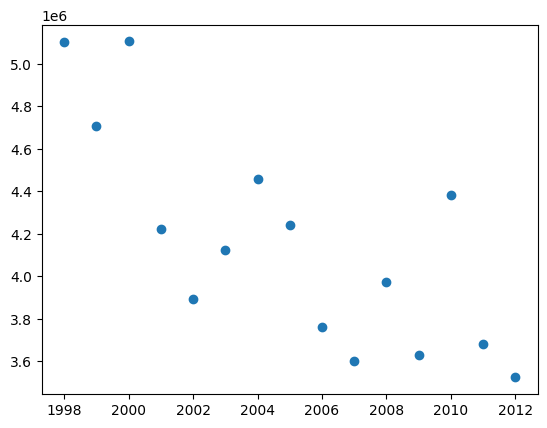

In [7]:
# Plotting the variables
plt.scatter(X, y)
plt.show;

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
# Creating the model
lr = LinearRegression()
# Fitting the model
lr.fit(X, y)

LinearRegression()

In [13]:
# Get the slope of the line
lr.coef_[0] # shows the change in the target variable with each unit change in the 'year' variable

-88303.18915238195

In [14]:
# Get the intercept
lr.intercept_ # provides the y-intercept of the linear regression line

181208083.10732982

In [16]:
# Predictions from the model based on the X data
y_predict = lr.predict(X)
y_predict

array([4778311.18087068, 4690007.99171829, 4601704.8025659 ,
       4513401.61341354, 4425098.42426115, 4336795.23510876,
       4248492.04595637, 4160188.85680401, 4071885.66765162,
       3983582.47849923, 3895279.28934687, 3806976.10019448,
       3718672.91104209, 3630369.7218897 , 3542066.53273734])

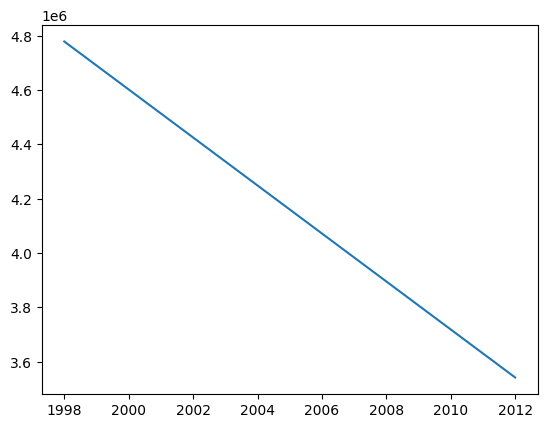

In [17]:
plt.plot(X, y_predict)
plt.show();

## Predicting the Honey Decline

In [18]:
# Create an array with years from 2013 to 2050
X_future = np.array(range(2013, 2050))
# Reshape the array
X_future = X_future.reshape(-1, 1)

In [20]:
# Predict the future honey production
future_predict = lr.predict(X_future)

1. Blue line: Represents the mean total production from the original data: 1998 to 2012
2. Orange line: Represents the predicted values using the model for the data: 1998 to 2012
3. Green line: Represents a prediction using the same model for the data: 2013 to 2050

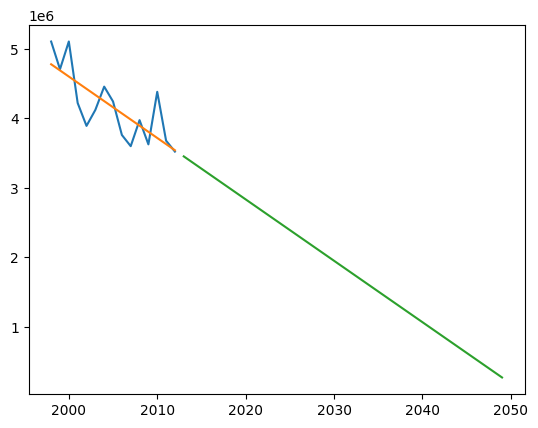

In [27]:
plt.plot(X, y)
plt.plot(X, y_predict)
plt.plot(X_future, future_predict)
plt.show();